In [15]:
using PyPlot

 ### <center> Homework Assignment 6 </center>

Héctor Andrade Loarca # 375708 

Melf Boeckel # 543098

Lets define first the 0-spline as the characteristic function in $[0,1]$
$$
B_0(x)=\chi_{[0,1]}(x)
$$

In [111]:
function B0(x)
    if 0<=x && x<=1
        1.0
    else
        0.0
    end
end

B0 (generic function with 1 method)

The next N-splines are defined as the convolution $B_N(x)=(B_0*B_{N-1})(x)$, the analytical computation of this is quite costly, the first spline will be:
\begin{equation}
\begin{aligned}
B_1(x)=B_0*B_0(x)=\int_{\mathbb{R}} \chi_{[0,1]}(y)\chi_{[0,1]}(x-y)dy=\int_{[0,1]}\chi_{[0,1]}(x-y)dy=|[0,1]\cap (x-[0,1])|
\end{aligned}
\end{equation}
$B_1(x)$ has as support $[0,2]$ (in general $B_N$ has support $[0,N+1]$ (as it was proven in the third exercise), and is defined as:
$$
B_1(x)=\begin{cases} 
x, & 0\leq x\leq 1 \\
2-x, & 1<x\leq 2\\
0, & \text{otherwise}. 
\end{cases}
$$

In [112]:
function B1(x)
    if 0<=x && x<=1
        float(x)
    elseif 1<x && x<=2
        float(2-x)
    else
        0.0
    end
end         

B1 (generic function with 1 method)

Lets plot this two first splines

In [173]:
B_0=[B0(x) for x in -1:0.005:8]
B_1=[B1(x) for x in -1:0.005:8]
x=[x for x in -1:0.005:8];

### $B_0$

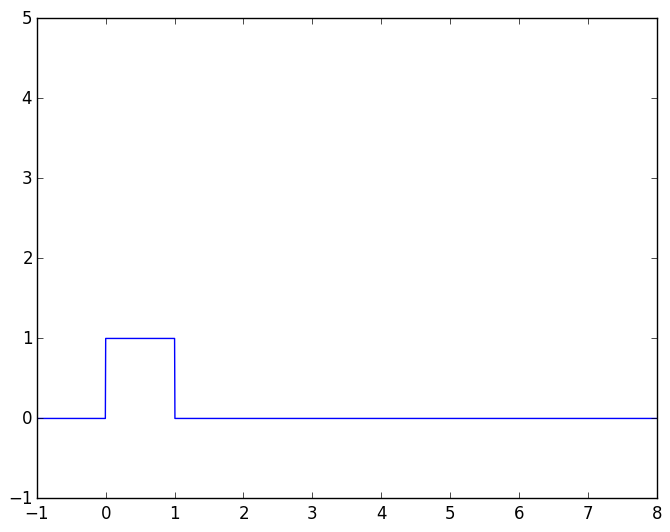

(-1,5)

In [174]:
plot(x,B_0)
ax=axes()
ax[:set_ylim]([-1,5])

### $B_1$

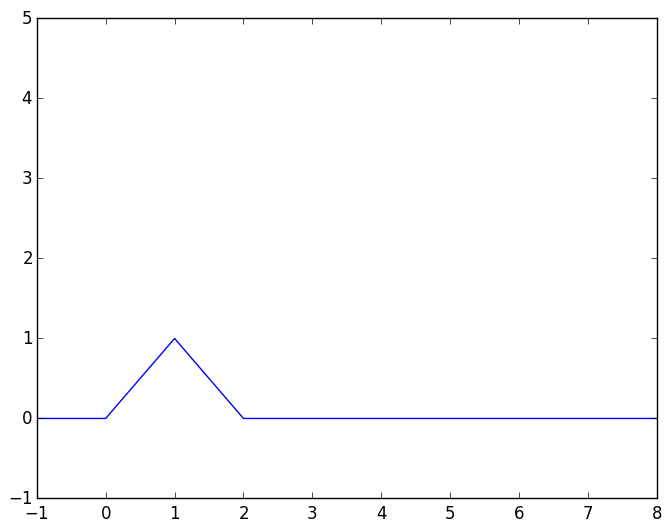

(-1,5)

In [175]:
plot(x,B_1)
ax=axes()
ax[:set_ylim]([-1,5])

As the other N-splines might be too costly to compute we can use the properties of the fourier transform acting on convolutions, i.e. 
$$
B_N(x)=\mathcal{F}^{-1}(\mathcal{F}(B_0*B_{N-1}))(x)=\mathcal{F}^{-1}(\mathcal{F}(B_0)\mathcal{F}(B_{N-1}))(x)
$$

As Benchmark we will use the already known $B_1(x)$

### $B_1$ with Fourier convolution

In [176]:
B_1test=abs(ifft(fft(B_0).*fft(B_0)));

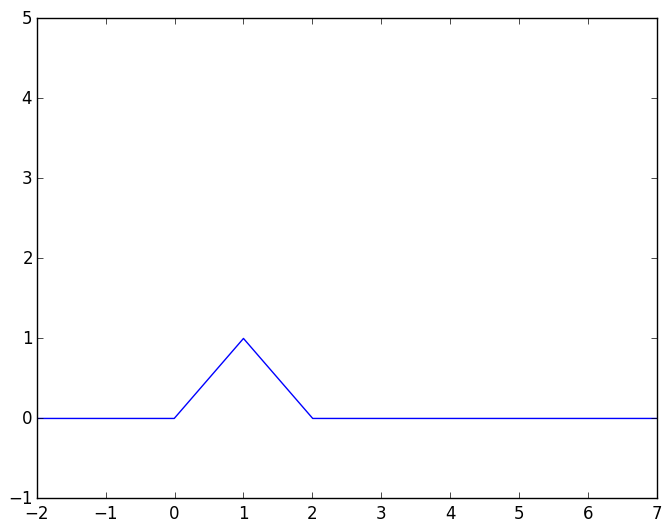

(-1,5)

In [177]:
plot(x-1,B_1test/maximum(B_1test))
ax=axes()
ax[:set_ylim]([-1,5])

It is working!, so we will apply to calculate the next 4 N-splines

### $B_2$ with Fourier convolution

In [178]:
B_2=abs(ifft(fft(B_0).*fft(B_1)));

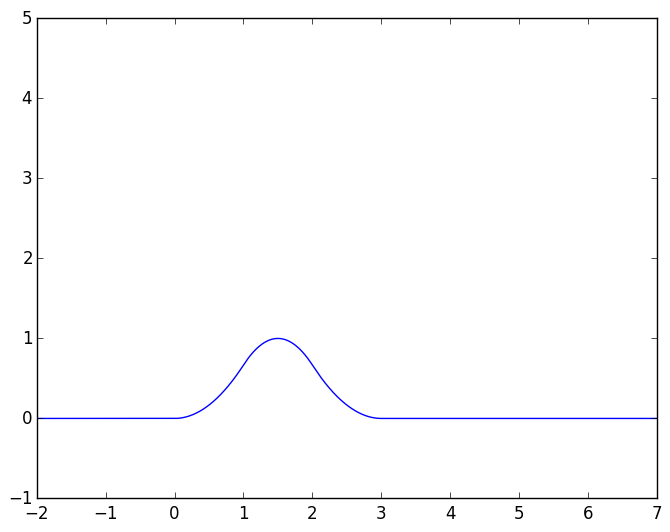

(-1,5)

In [185]:
plot(x-1,B_2/maximum(B_2))
ax=axes()
ax[:set_ylim]([-1,5])

### $B_3$ with Fourier convolution

In [192]:
B_3=abs(ifft(fft(B_0).*fft(B_2)));

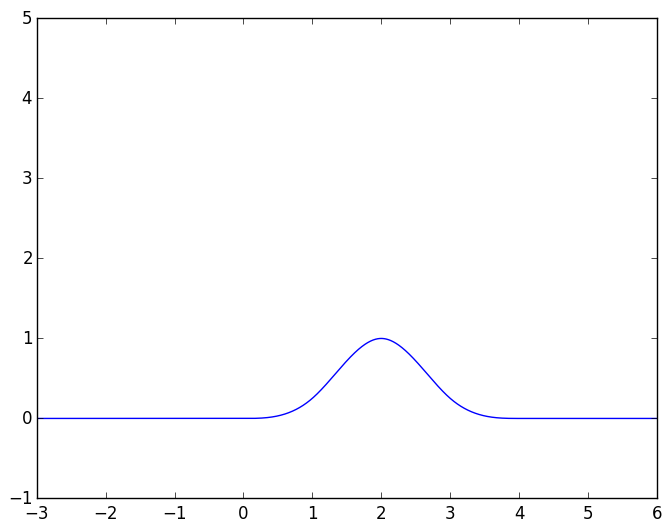

(-1,5)

In [193]:
plot(x-2,B_3/maximum(B_3))
ax=axes()
ax[:set_ylim]([-1,5])

### $B_4$ with Fourier convolution

In [188]:
B_4=abs(ifft(fft(B_0).*fft(B_3)));

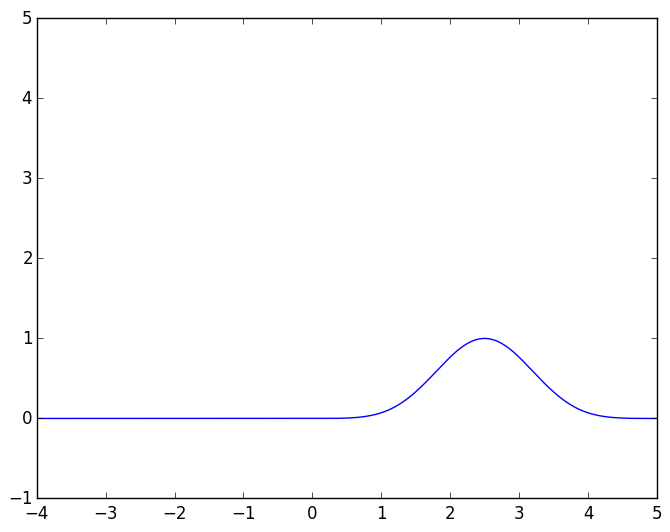

(-1,5)

In [191]:
plot(x-3,B_4/maximum(B_4))
ax=axes()
ax[:set_ylim]([-1,5])

Finally we can answered the question responding to the questions in the exercise with this observations

- What can you say about the support of $B_N$ for increasing $N$? It is visible in the plots that the support of $B_N$ is [0,N+1].
- What can you say about the regularity of $B_N$ for increasing $N$? It is also visible that the regularity increases with $N$, since $B_0$ is piecewise continuous, $B_1$ is continuous but not differentiable, and $B_2$,$B_3$,$B_4$ are differentiable.